In [1]:
import numpy as np

In [2]:

class LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    



In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# The 'iris' object is a Bunch object, which is similar to a dictionary.
# It contains the following keys:
# 'data': The feature matrix (sepal length, sepal width, petal length, petal width)
# 'target': The target vector (species: 0 for setosa, 1 for versicolor, 2 for virginica)
# 'feature_names': Names of the features
# 'target_names': Names of the target classes

# You can access the data and target separately:
X = iris.data  # Features
y = iris.target  # Target variable

In [8]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
def train_test_split_manual(X, y, test_size=0.25, random_state=None):
    """
    Splits arrays or matrices into random train and test subsets.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The features data.
    y : array-like, shape (n_samples,)
        The target variable.
    test_size : float, default=0.25
        The proportion of the dataset to include in the test split.
        Should be between 0.0 and 1.0.
    random_state : int, RandomState instance or None, default=None
        Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls.

    Returns:
    X_train, X_test, y_train, y_test : arrays
        Splits of the input data.
    """
    if not (0.0 < test_size < 1.0):
        raise ValueError("test_size must be a float between 0.0 and 1.0")

    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    n_test_samples = int(n_samples * test_size)
    test_indices = indices[:n_test_samples]
    train_indices = indices[n_test_samples:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=1234)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

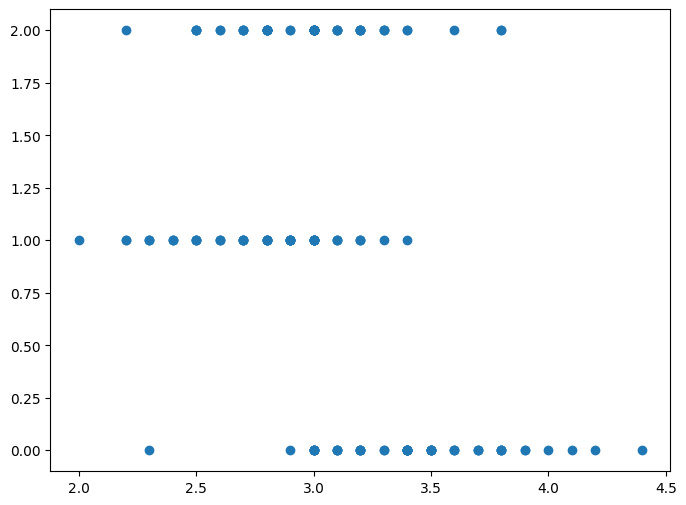

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y)
plt.show()

In [13]:
reg = LinearRegression(lr=0.01)
reg

In [22]:
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

In [15]:
predictions

array([ 1.35087083,  1.38868168,  1.81205118,  0.01292933,  1.20470053,
        0.04606499, -0.04559219, -0.11995062,  1.19003801,  2.12849433,
        1.08204696, -0.02898975,  2.16090337,  1.26502275,  0.13994984,
        0.89095375,  2.1677764 ,  0.02454833,  1.85673584,  1.23726923,
        1.1896004 ,  1.35299945,  1.31449229,  1.32592258,  2.10731497,
       -0.06175702,  1.57772529,  1.11985781,  1.93582881,  0.02990016])

In [23]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


mse = mse(y_test, predictions)
print(mse)

0.041408435428664014


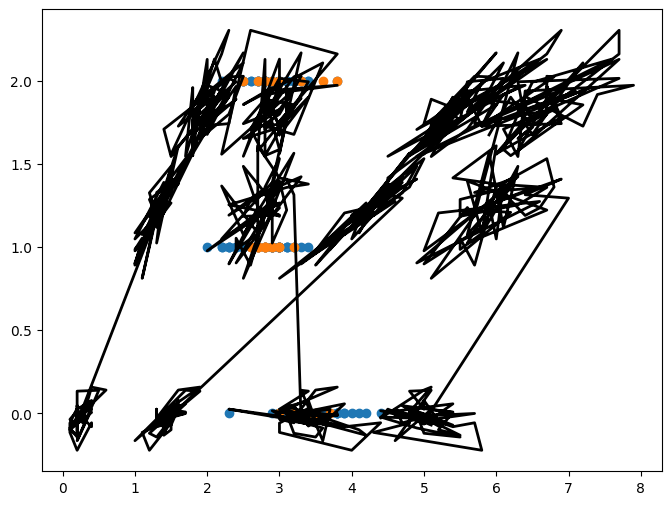

In [24]:
y_pred_line = reg.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train[:, 1], y_train)
m2 = plt.scatter(X_test[:, 1], y_test)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()